In [10]:
from sklearn.datasets import fetch_california_housing

In [11]:
house=fetch_california_housing()

In [14]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [16]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
print(house.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [18]:
print(house.target_names)

['MedHouseVal']


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.DataFrame(house.data,columns=[house.feature_names])

In [26]:
df['MedHouseVal']=house.target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (MedInc,)       20640 non-null  float64
 1   (HouseAge,)     20640 non-null  float64
 2   (AveRooms,)     20640 non-null  float64
 3   (AveBedrms,)    20640 non-null  float64
 4   (Population,)   20640 non-null  float64
 5   (AveOccup,)     20640 non-null  float64
 6   (Latitude,)     20640 non-null  float64
 7   (Longitude,)    20640 non-null  float64
 8   (MedHouseVal,)  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


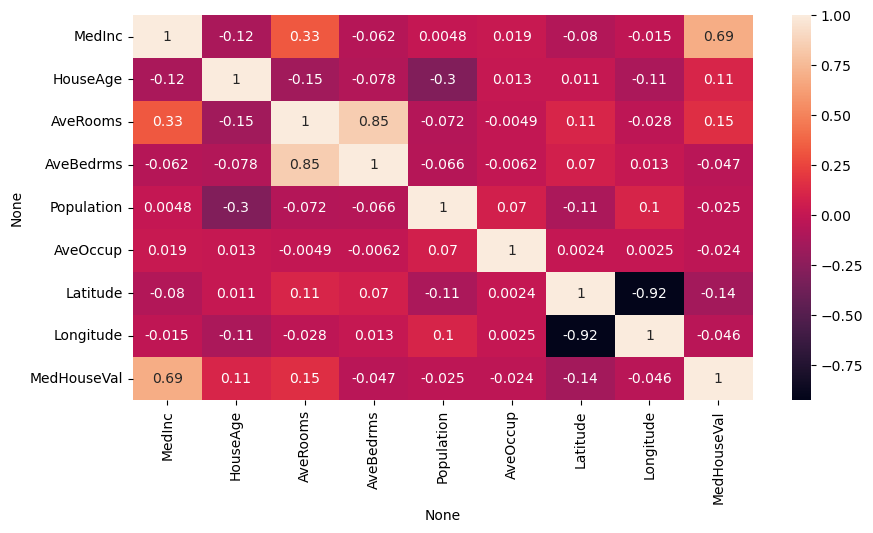

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

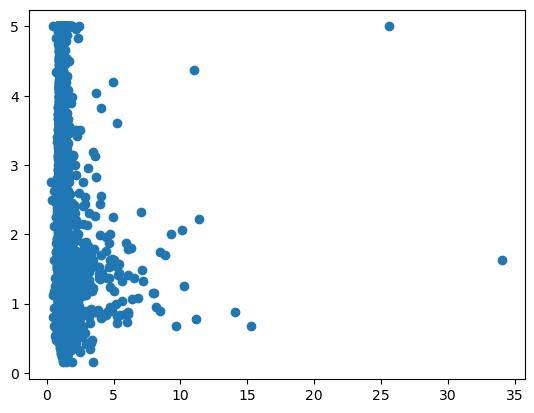

In [62]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'])
plt.show()

In [31]:
df.duplicated().sum()

0

In [37]:
x=df.iloc[:,:-1]
y=df['MedHouseVal']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
x_train.shape

(16512, 8)

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train,y_train)

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [63]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
lr=LinearRegression()
#lg=LogisticRegression()
lr.fit(x_train,y_train)
#lg.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.score(x_test,y_test)

0.5757877060324511

In [48]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
dr.score(x_test,y_test)

0.619202031442419

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
model1 = GradientBoostingRegressor(random_state=42, n_estimators=100)
model1.fit(x_train, y_train)
model1.score(x_test,y_test)
model1.predict(sc.transform(house.data[0].reshape(1,-1)))
#okay

C:\Users\PUSHPENDAR\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.91751978])

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

C:\Users\PUSHPENDAR\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8051230593157366

In [74]:
house.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [75]:
model.predict(sc.transform(house.data[0].reshape(1,-1)))

array([1.4362204])

In [87]:
import pickle
pickle.dump(model1,open('regmodel.pkl','wb'))

In [88]:
pickle.dump(sc,open('scaler.pkl','wb'))

In [91]:
pickle_m=pickle.load(open('regmodel.pkl','rb'))
pickle_s=pickle.load(open('scaler.pkl','rb'))

TypeError: 'StandardScaler' object is not callable